In [1]:
import logging
import os
import sys
import gym
from gym.envs.mujoco.humanoid import HumanoidEnv
from src.init_qpos_modifer import InitQposModifierFactory

In [2]:
FORMAT = '%(asctime)s: %(message)s'
logging.basicConfig(format=FORMAT, stream=sys.stdout, level=logging.INFO)

In [3]:
class ParametrizableResetHumanoid(HumanoidEnv):
    def __init__(self):
        super().__init__()

        qpos_modifier = InitQposModifierFactory.get_default()
        logging.info(f"Modifying Humanoid init_qpot using {qpos_modifier}")
        self.init_qpos = qpos_modifier.modify_init_qpos(self.init_qpos)

In [4]:
new_env_name = 'ParametrizableResetHumanoid-v2'

gym.envs.register(
    id=new_env_name,
    entry_point=ParametrizableResetHumanoid,
    max_episode_steps=1000,
)
logging.info(f"Registered new environment: {new_env_name}")


2022-03-29 14:20:25,975: Registered new environment: ParametrizableResetHumanoid-v2


In [5]:
name_of_InitQposModifier = "abdomen_z"

os.environ["DEFAULT_InitQposModifier"] = name_of_InitQposModifier
logging.info(f"Set env variable DEFAULT_InitQposModifier={name_of_InitQposModifier}")

2022-03-29 14:20:25,980: Set env variable DEFAULT_InitQposModifier=abdomen_z


In [6]:
name_of_InitQposModifier = "abdomen_z"

os.environ["DEFAULT_InitQposModifier"] = name_of_InitQposModifier
logging.info(f"Set env variable DEFAULT_InitQposModifier={name_of_InitQposModifier}")

env = gym.make(new_env_name)
observation = env.reset()

first_frame = env.render(mode='rgb_array')
print(f"Type of first frame: {type(first_frame)}")

for _ in range(1000):
    env.render()
    action = env.action_space.sample()  # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)

    if done:
        observation = env.reset()
env.close()

2022-03-29 14:20:25,987: Set env variable DEFAULT_InitQposModifier=abdomen_z
2022-03-29 14:20:25,999: Modifying Humanoid init_qpot using <src.init_qpos_modifer.AbdomenZInitQposModifier object at 0x7f5935275a10>
Type of first frame: <class 'numpy.ndarray'>
Creating window glfw


In [8]:
type(first_frame)

numpy.ndarray

In [10]:
import matplotlib.pyplot as plt

2022-03-29 14:22:11,958: generated new fontManager


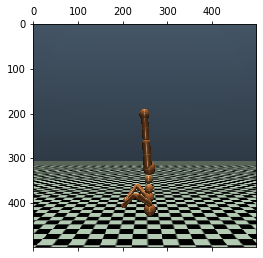

In [11]:
plt.matshow(first_frame)